In [1]:
from sentence_transformers import SentenceTransformer, util
import os
from general_dataset import GeneralDataset
from torch.utils.data import DataLoader
import torch
from agi_utils import *
import torch
from tqdm import tqdm
from combine_module_seq import SeqCombine
from torchvision import transforms


In [2]:
"""
assign openagi data path 
"""
data_path = "YOUR_DATA_PATH"


task_discriptions = txt_loader("./task_description.txt")
test_task_idx = [2,3,10,15,20,35,45,55,65,70,70,90,106,107]
test_dataloaders = []
for i in test_task_idx:
    dataset = GeneralDataset(i, data_path)
    dataloader = DataLoader(dataset, batch_size=5)
    test_dataloaders.append(dataloader)
    
test_tasks = [task_discriptions[i].strip() for i in test_task_idx]

f = transforms.ToPILImage()
device_list = ["cuda:2","cpu"]
seqComination = SeqCombine(device_list)

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

The config attributes {'scaling_factor': 0.18215} were passed to AutoencoderKL, but are not expected and will be ignored. Please verify your config.json configuration file.


In [3]:
# module_list = "Text Summarization, Machine Translation"
# module_list = 'Image Deblurring'
module_list = "Image Super Resolution, Image Denoising, Image Deblurring, Colorization"
# module_list = 'Image Deblurring, Colorization, Image Denoising, Image Super Resolution'
# module_list = 'Image Super Resolution, Image Deblurring, Colorization, Image Classification, Machine Translation'
# module_list = 'Image Super Resolution, Image Deblurring, Object Detection'
# module_list = 'Image Deblurring'
# module_list = "Text Summarization, Machine Translation"
# module_list = "Image Captioning"
# module_list = "Fill Mask, Text to Image Generation"
# module_list = "Colorization, Object Detection, Machine Translation"


i = 0
for idx, batch in enumerate(tqdm(test_dataloaders[i])):
    
    inputs = list(batch['input'][0])
    labels = list(batch['output'][0])
    seqComination.construct_module_seq(module_list)
    predictions = seqComination.run_module_seq(inputs)
    break
    
seqComination.close_module_seq()

  0%|                                                    | 0/20 [00:38<?, ?it/s]


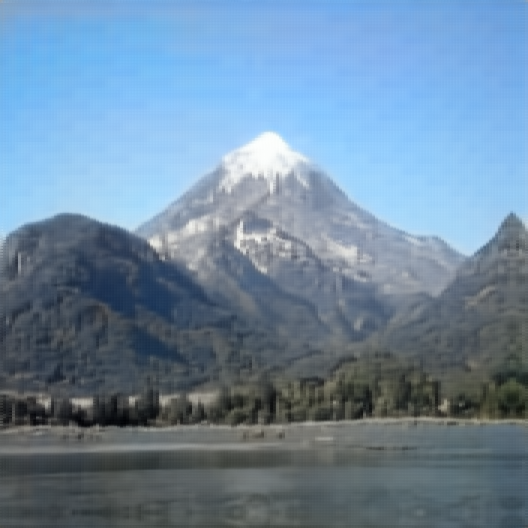

In [6]:
f(predictions[2])

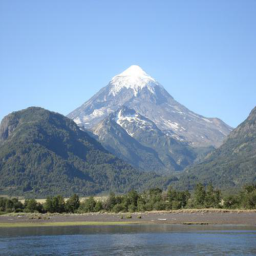

In [8]:
f(labels[2])